In [1]:
import os

data = "../data/leafsnap-dataset/dataset/images"

field_dataset = os.path.join(data, "field")

species = os.listdir(field_dataset)
print(f"Number of field species: {len(species)}")
print("First 5 species:", species[:5])

Number of field species: 184
First 5 species: ['abies_concolor', 'abies_nordmanniana', 'acer_campestre', 'acer_ginnala', 'acer_griseum']


In [2]:
lab_dataset = os.path.join(data, "lab")

species = os.listdir(lab_dataset)
print(f"Number of lab species: {len(species)}")
print("First 5 species:", species[:5])

Number of lab species: 185
First 5 species: ['abies_concolor', 'abies_nordmanniana', 'acer_campestre', 'acer_ginnala', 'acer_griseum']


In [3]:

leaf_categories = ["lab", "field"]

In [4]:
for category in leaf_categories:
    category_path = os.path.join(data, category)
    species = os.listdir(category_path)
    print(f"Number of species in {category}: {len(species)}")
    print("First 5 species:", species[:5])
    for species_name in species[:5]:
        species_path = os.path.join(category_path, species_name)

        species_images = os.listdir(species_path)

        print(f"Number of images in {species_name}: {len(species_images)}")


Number of species in lab: 185
First 5 species: ['abies_concolor', 'abies_nordmanniana', 'acer_campestre', 'acer_ginnala', 'acer_griseum']
Number of images in abies_concolor: 200
Number of images in abies_nordmanniana: 124
Number of images in acer_campestre: 108
Number of images in acer_ginnala: 120
Number of images in acer_griseum: 80
Number of species in field: 184
First 5 species: ['abies_concolor', 'abies_nordmanniana', 'acer_campestre', 'acer_ginnala', 'acer_griseum']
Number of images in abies_concolor: 51
Number of images in abies_nordmanniana: 35
Number of images in acer_campestre: 36
Number of images in acer_ginnala: 31
Number of images in acer_griseum: 46


In [5]:
image_counts = {}
for dirpath, subdirnames, filenames in os.walk(data):
    if filenames and os.path.normpath(dirpath) != os.path.normpath(data):
        parts = os.path.normpath(dirpath).split(os.sep)
        category = parts[-2]  
        image_counts[category] = image_counts.get(category, 0) + len(filenames)

print("\nNumber of images per category:")
for category, count in image_counts.items():
    print(f"- {category}: {count} images")


Number of images per category:
- field: 7719 images
- lab: 23147 images


In [6]:
import matplotlib.pyplot as plt
import random
from PIL import Image


# Visualize Random Samples for labs

Images of species: quercus_imbricaria


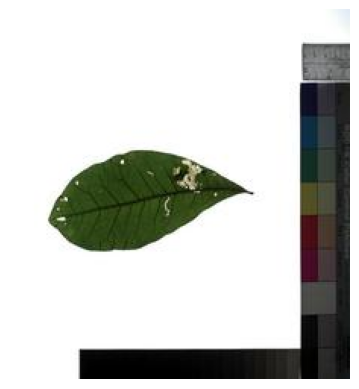

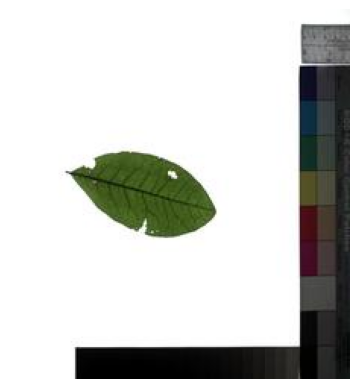

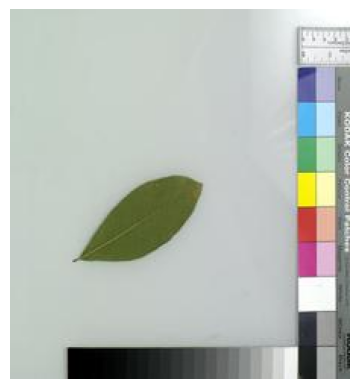

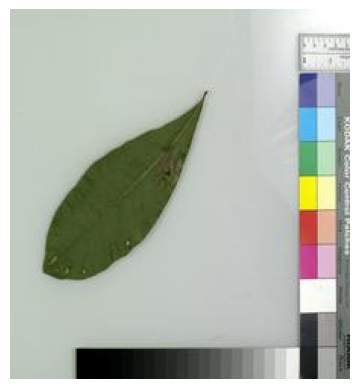

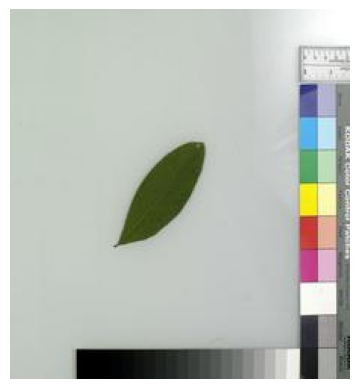

In [7]:
lab_dataset = os.path.join(data, "lab")
sample_species = random.choice(os.listdir(lab_dataset))

images = os.listdir(os.path.join(lab_dataset, sample_species))

sample_images = random.sample(images, 5)

print("Images of species:", sample_species)

for img in sample_images:
    img_path = os.path.join(data, "lab", sample_species, img)
    image = plt.imread(img_path)
    plt.imshow(image)
    plt.axis("off")
    plt.show()



# Visualize Random Samples for fields


Images of species: acer_campestre


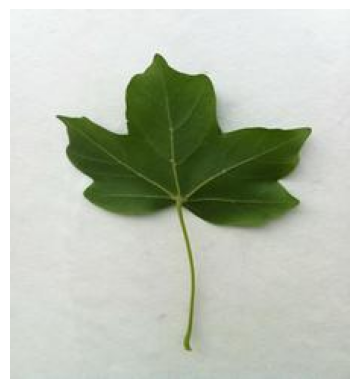

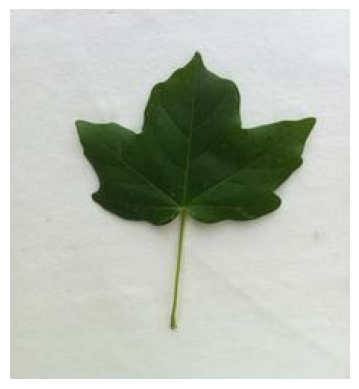

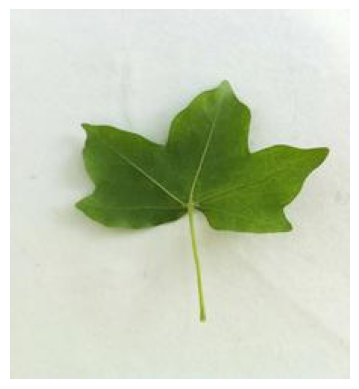

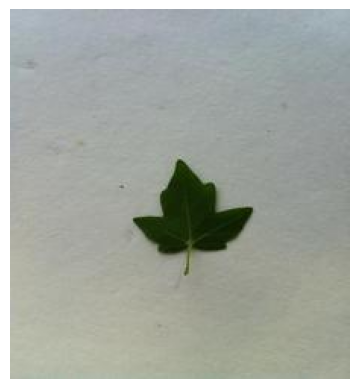

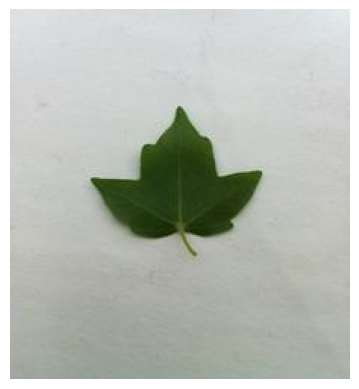

In [8]:
field_dataset = os.path.join(data, "field")
sample_field_species = random.choice(os.listdir(field_dataset))

images = os.listdir(os.path.join(field_dataset, sample_field_species))

sample_images = random.sample(images, 5)

print("Images of species:", sample_field_species)

for img in sample_images:
    img_path = os.path.join(data, "field", sample_field_species, img)
    image = plt.imread(img_path)
    plt.imshow(image)
    plt.axis("off")
    plt.show()



# Data statistics of the images

In [10]:
def compute_image_sizes(dataset_path, image_sizes):
    for species in os.listdir(dataset_path):
        species_images = os.listdir(os.path.join(dataset_path, species))
        for img in species_images:
            img_path = os.path.join(dataset_path, species, img)
            try:
                image = Image.open(img_path)
                image_sizes.add(image.size)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")
    return image_sizes


In [11]:
unique_lab_img_sizes = set()

unique_lab_img_sizes = compute_image_sizes(lab_dataset, unique_lab_img_sizes)

print(f"Unique lab image sizes: {unique_lab_img_sizes}")
print(f"Image sizes count: {len(unique_lab_img_sizes)}")

Unique lab image sizes: {(224, 244)}
Image sizes count: 1


In [13]:
# field images

unique_field_img_sizes = set()

unique_field_img_sizes = compute_image_sizes(field_dataset, unique_field_img_sizes)

print(f"Unique field image sizes: {unique_field_img_sizes}")
print(f"Image sizes count: {len(unique_field_img_sizes)}")

Unique field image sizes: {(224, 244)}
Image sizes count: 1


# Resize the images

In [ ]:
def resize_image(image_path, output_size=(224, 244)):
    ''' Resize an image to the specified output size.'''
    if not os.path.exists(image_path):
        print(f"Image path {image_path} does not exist.")
        return None
    try:
        image = Image.open(image_path).convert("RGB")
        image = image.resize(output_size, Image.LANCZOS)
        image.save(image_path)
        return image_path
    except Exception as e:
        print(f"Error occured when resizing  {image_path}: {e}")
        return None


In [ ]:
def resize_images_in_directory(dataset_directory, output_size=(224, 244)):
    ''' Resize all images in a directory to the specified output size.'''
    for root, dirs, files in os.walk(dataset_directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                resize_image(image_path, output_size)

In [ ]:
# resize lab images
resize_images_in_directory(lab_dataset, output_size=(224, 224))

In [ ]:
# Resize field images
resize_images_in_directory(field_dataset, output_size=(224, 224))